In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\rocki\Downloads\Tomato.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
df = df.replace(',', '.', regex=True)

## Первичная обработка данных и визуализация

### Первичный анализ

Выведем первые 5 строк датасета:

In [4]:
df.head()

,Unit,Minimum,Maximum,Average,Market
Date,,,,,
2013-06-16,Kg,26,32,29.0,Tomato
2013-06-17,Kg,20,25,22.5,Tomato
2013-06-18,Kg,22,26,24.0,Tomato
2013-06-19,Kg,24,28,26.0,Tomato
2013-06-20,Kg,22,26,24.0,Tomato


Определим размер датасета:

In [5]:
df.shape

(2741, 5)

In [6]:
df = df.head(300)

Определим типы данных:

In [7]:
df.dtypes

Unit        object
Minimum      int64
Maximum      int64
Average    float64
Market      object
dtype: object

### Обработка данных

In [8]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [9]:
draw_missing(df).round(1)

,Total,Percent
Unit,0,0.0
Minimum,0,0.0
Maximum,0,0.0
Average,0,0.0
Market,0,0.0


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [11]:
sc1 = MinMaxScaler()
df['Average'] = sc1.fit_transform(df[['Average']])
df['Maximum'] = sc1.fit_transform(df[['Maximum']])
df['Minimum'] = sc1.fit_transform(df[['Minimum']])
df

,Unit,Minimum,Maximum,Average,Market
Date,,,,,
2013-06-16,Kg,0.222222,0.261538,0.242188,Tomato
2013-06-17,Kg,0.126984,0.153846,0.140625,Tomato
2013-06-18,Kg,0.158730,0.169231,0.164062,Tomato
2013-06-19,Kg,0.190476,0.200000,0.195312,Tomato
2013-06-20,Kg,0.158730,0.169231,0.164062,Tomato
...,...,...,...,...,...
2014-06-30,Kg,0.063492,0.076923,0.070312,Tomato
2014-07-01,Kg,0.063492,0.076923,0.070312,Tomato
2014-07-02,Kg,0.031746,0.046154,0.039062,Tomato


In [12]:
df

,Unit,Minimum,Maximum,Average,Market
Date,,,,,
2013-06-16,Kg,0.222222,0.261538,0.242188,Tomato
2013-06-17,Kg,0.126984,0.153846,0.140625,Tomato
2013-06-18,Kg,0.158730,0.169231,0.164062,Tomato
2013-06-19,Kg,0.190476,0.200000,0.195312,Tomato
2013-06-20,Kg,0.158730,0.169231,0.164062,Tomato
...,...,...,...,...,...
2014-06-30,Kg,0.063492,0.076923,0.070312,Tomato
2014-07-01,Kg,0.063492,0.076923,0.070312,Tomato
2014-07-02,Kg,0.031746,0.046154,0.039062,Tomato


In [13]:
df = df.drop(columns=['Unit'], axis=1)
df = df.drop(columns=['Minimum'], axis=1)
df = df.drop(columns=['Maximum'], axis=1)
df = df.drop(columns=['Market'], axis=1)

### Основные статистические характеристки

In [14]:
df.describe()

,Average
count,300.000000
mean,0.352604
std,0.212951
min,0.000000
25%,0.218750
50%,0.296875
75%,0.453125
max,1.000000


### Визуализация исходного временного ряда

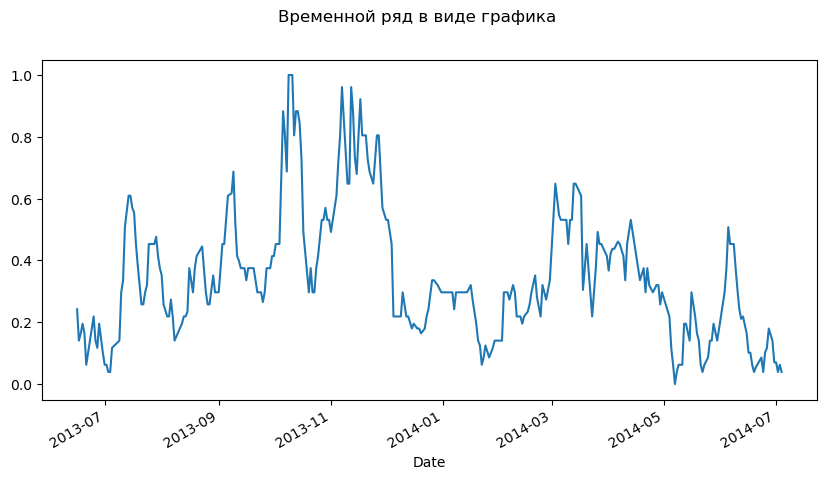

In [15]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
df.plot(ax=ax, legend=False)
pyplot.show()

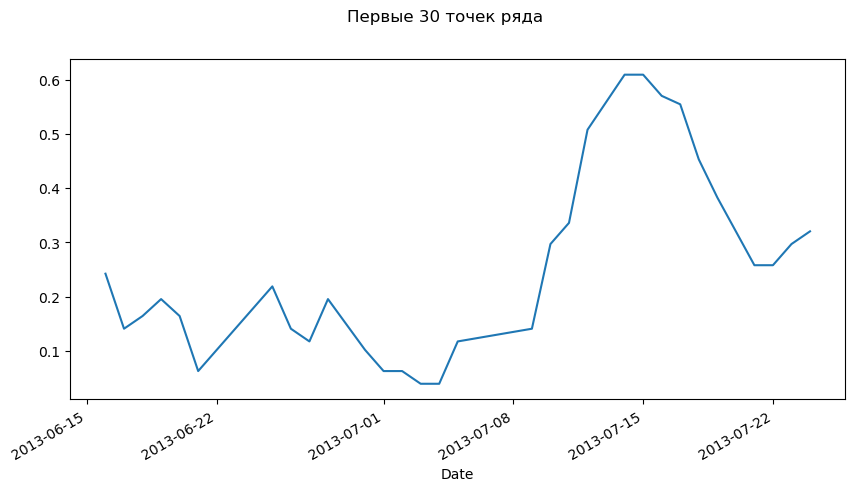

In [16]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Первые 30 точек ряда')
df[:30].plot(ax=ax, legend=False)
pyplot.show()

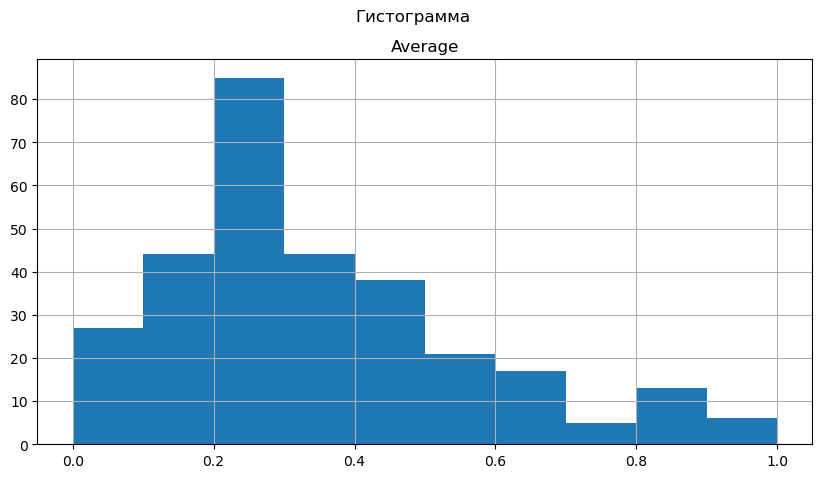

In [17]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
df.hist(ax=ax, legend=False)
pyplot.show()

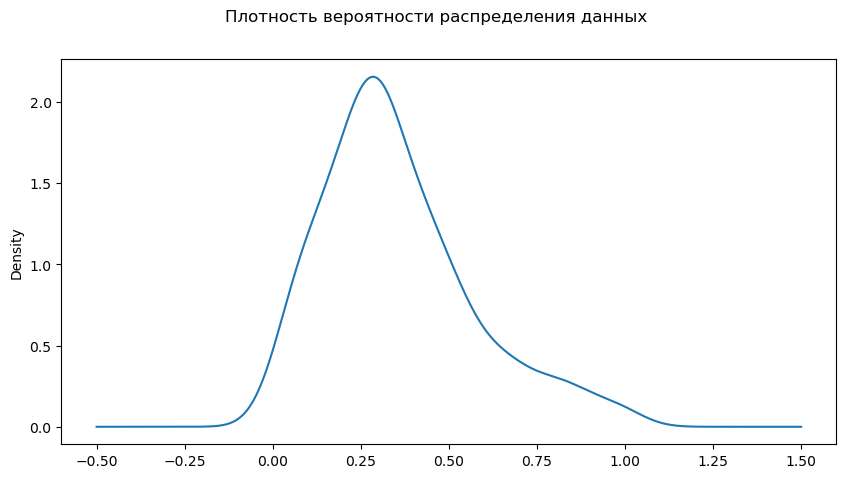

In [18]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
df.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

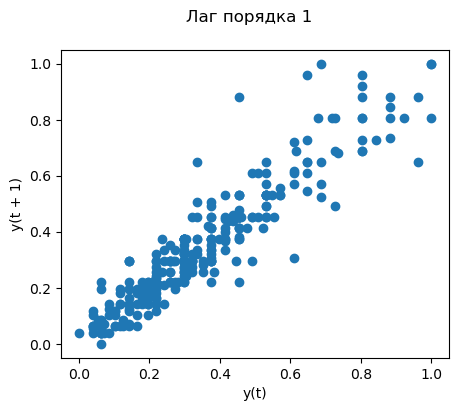

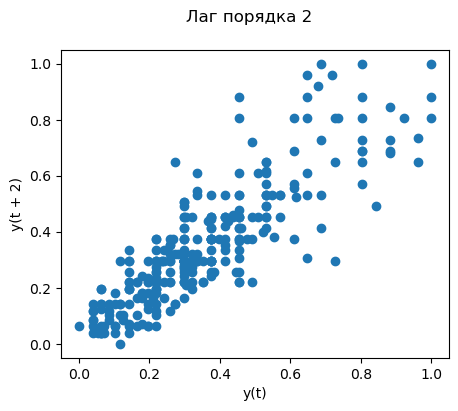

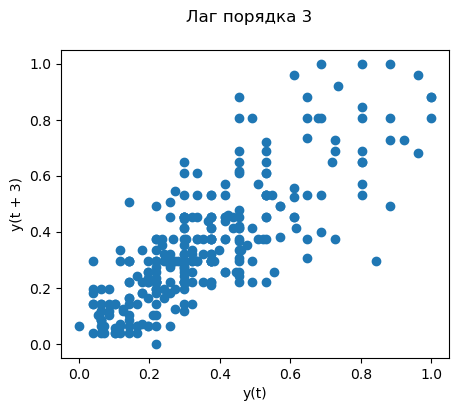

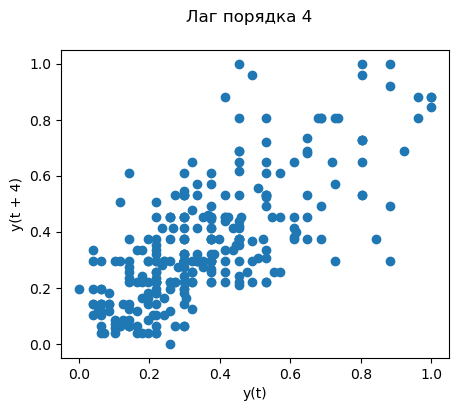

In [19]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(df, lag=i, ax=ax)
    pyplot.show()

Наблюдается достаточно сильная положительная корреляция.

Автокорреляционная диаграмма:

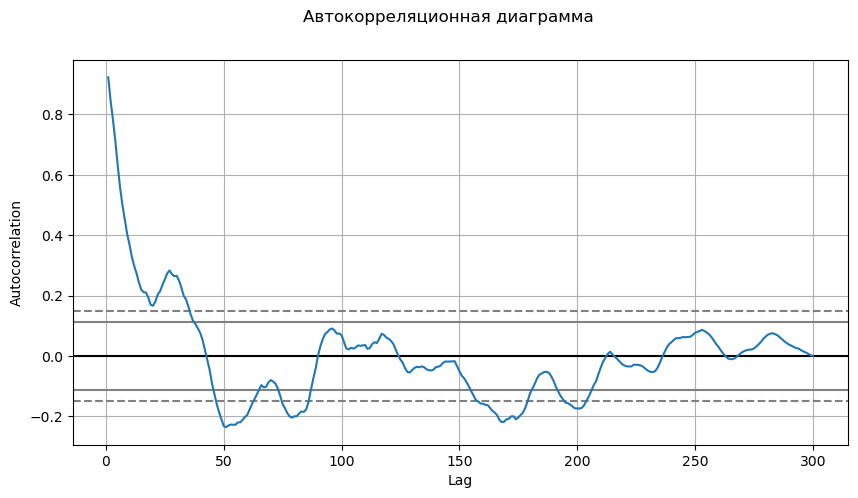

In [20]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(df, ax=ax)
pyplot.show()

Автокорреляционная функция:

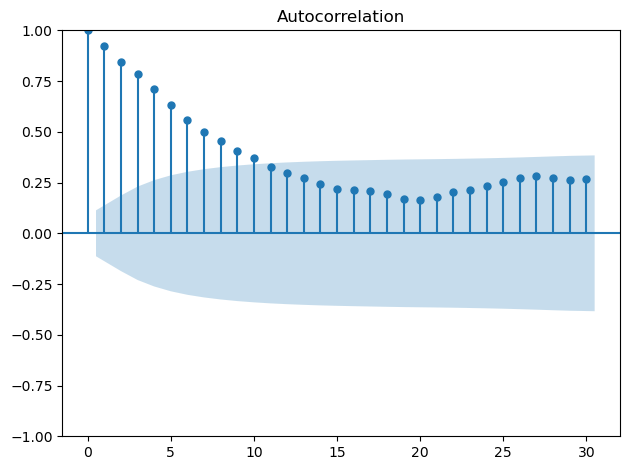

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=30)
plt.tight_layout()

Частичная автокорреляционная функция:

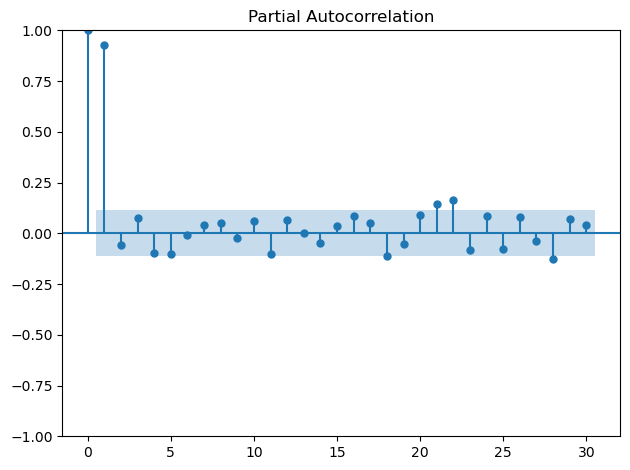

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df, lags=30)
plt.tight_layout()

Временной ряд со скользящими средними:

In [23]:
df2 = df.copy()

In [24]:
df2['SMA_10'] = df2['Average'].rolling(10, min_periods=1).mean()
df2['SMA_20'] = df2['Average'].rolling(20, min_periods=1).mean()

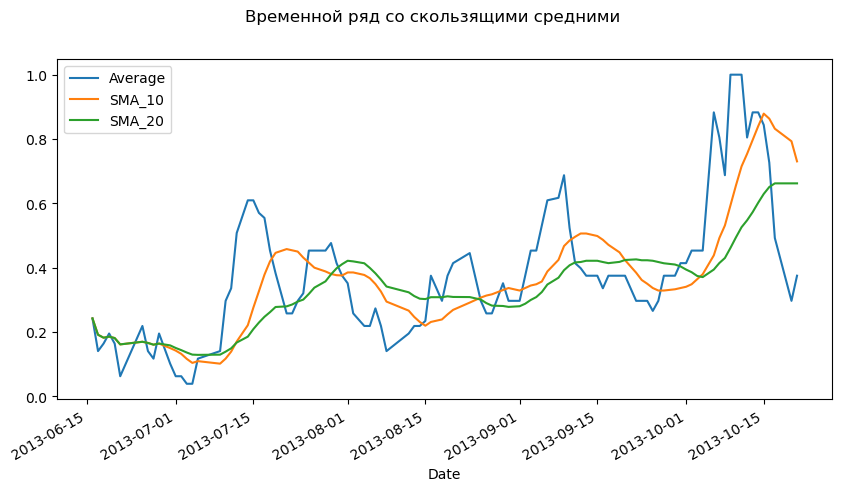

In [25]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд со скользящими средними')
df2[:100].plot(ax=ax, legend=True)
pyplot.show()

## Прогнозирование временного ряда с использованием авторегрессионного метода

Будем использовать авторегриссионный метод ARIMA:

In [26]:
from statsmodels.tsa.arima.model import ARIMA

Разделение выборки на обучающую и тестовую

In [27]:
xnum = list(range(df2.shape[0]))
Y = df2['Average'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]

## Прогноз ARIMA


In [28]:
arima_order = (6, 1, 0)
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])

In [29]:
df2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)

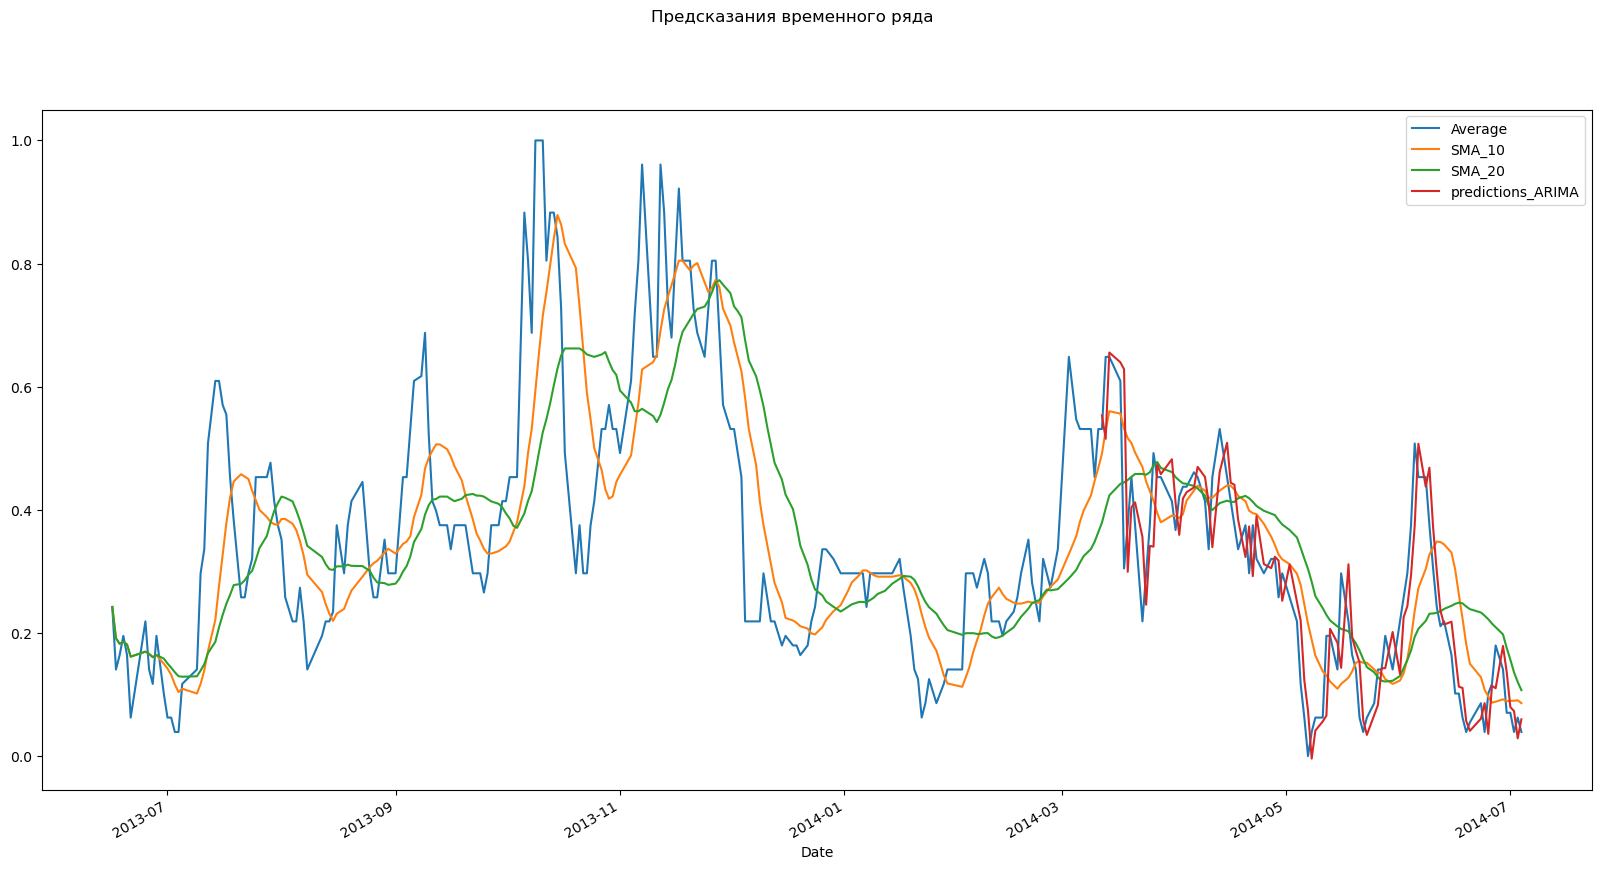

In [30]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Предсказания временного ряда')
df2.plot(ax=ax, legend=True)
pyplot.show()

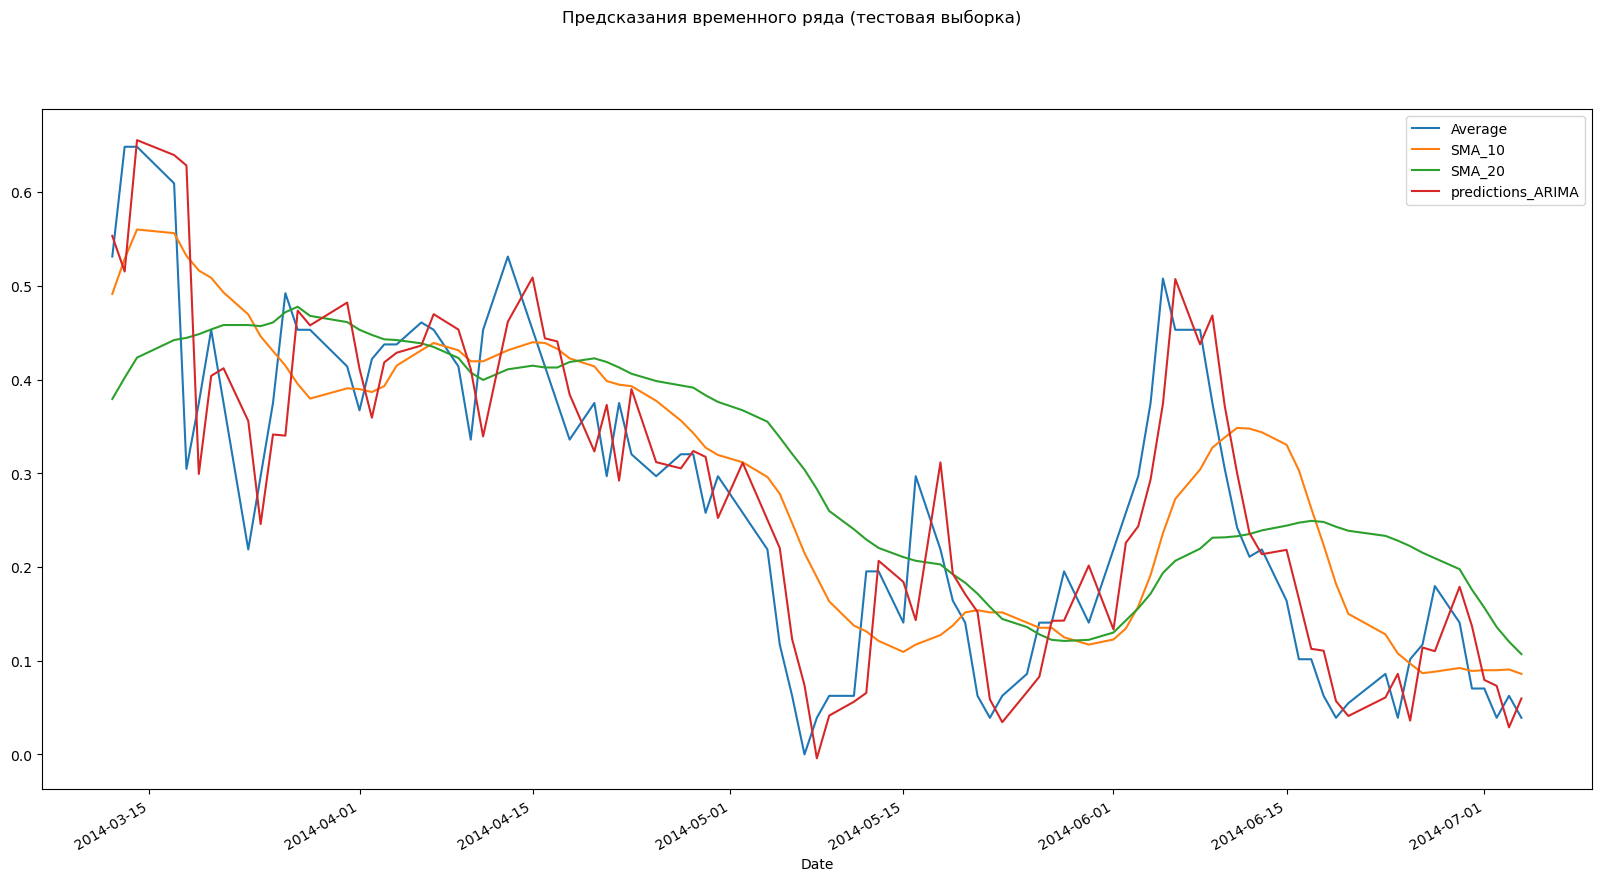

In [31]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
df2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

Предсказания ARIMA точны, близки к исходному, далеки от среднего скользящего.

## Метрики

MAE и MSE:

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mean_squared_error(test, predictions_arima, squared=False)

0.06977076012984242

In [34]:
mean_absolute_error(test, predictions_arima)

0.053066613469521094

## Прогнозирование временного ряда с использованием метода символьной регрессии

Будем использовать библиотеку gplearn:

In [35]:
# pip install gplearn

In [36]:
from gplearn.genetic import SymbolicRegressor

In [37]:
function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=500, metric='mse',
                               generations=200, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-10, 10), random_state=0)

In [38]:

est_gp.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65      3.27398e+50       14         0.108991              N/A     14.86m
   1    68.74      2.42434e+12       18         0.050162              N/A      3.68m
   2    16.67      5.89295e+07       18        0.0484429              N/A      2.22m
   3    18.60       3.8058e+06       31        0.0477716              N/A      2.41m
   4    14.46          47.1214       10        0.0484429              N/A      2.33m
   5     7.85           768774       10        0.0484429              N/A      1.94m
   6     4.48          65.4402       10        0.0484429              N/A      1.95m
   7     3.92          2076.39        4        0.0514879              N/A      1.89m
   8     3.91          34.2876        4        0.0514879              N/A  

  94     3.97          59.4197        4        0.0494775              N/A      1.19m
  95     4.20          154.021        4        0.0494775              N/A      1.06m
  96     4.09          488.355        4        0.0494775              N/A      1.06m
  97     4.01          209.267        4        0.0494775              N/A      1.07m
  98     4.41          62.2298        4        0.0494775              N/A      1.19m
  99     4.27          57.0012        4        0.0494775              N/A      1.15m
 100     4.09          1403.47        4        0.0494775              N/A      1.20m
 101     4.10          30.1636        4        0.0494775              N/A      1.41m
 102     4.05          1892.15        4        0.0494775              N/A      1.03m
 103     4.05           31.973        4        0.0494775              N/A      1.08m
 104     4.01          93.9222        4        0.0494775              N/A      1.09m
 105     3.94          150.316        4        0.0494775         

 191     2.06      1.54027e+06        3        0.0490939              N/A      6.18s
 192     2.22           973720        3        0.0490939              N/A      5.57s
 193     2.04          2628.96        3        0.0490939              N/A      4.73s
 194     2.05          37.3204        3        0.0490939              N/A      3.70s
 195     2.28      5.55159e+27        3        0.0490939              N/A      2.98s
 196     2.17           8019.5        3        0.0490939              N/A      2.35s
 197     2.07      2.87662e+08        3        0.0490939              N/A      1.40s
 198     1.99          124.172        3        0.0490939              N/A      0.64s
 199     2.01          13.1812        3        0.0490939              N/A      0.00s


SymbolicRegressor(const_range=(-10, 10),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=200, init_depth=(4, 10), metric='mse',
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [39]:
y_gp = est_gp.predict(np.array(xnum_test).reshape(-1, 1))
y_gp[:30]

array([0.41598633, 0.41598633, 0.41598633, 0.41598633, 0.41598633,
       0.41598633, 0.41598633, 0.41598633, 0.41598633, 0.41598633,
       0.41598633, 0.41598633, 0.41598633, 0.41598633, 0.41598633,
       0.41598633, 0.41598633, 0.41598633, 0.41598633, 0.41598633,
       0.41598633, 0.41598633, 0.41598633, 0.41598633, 0.41598633,
       0.41598633, 0.41598633, 0.41598633, 0.41598633, 0.41598633])

In [40]:
df2['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_gp)

## Метрики

MAE и MSE:

In [41]:
mean_squared_error(test, y_gp, squared=False)

0.22247579153806007

In [42]:
mean_absolute_error(test, y_gp)

0.18349001963901593

## Multi

In [43]:
import gmdh
import seaborn as sns

C:\Users\rocki\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\rocki\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [44]:
df

,Average
Date,
2013-06-16,0.242188
2013-06-17,0.140625
2013-06-18,0.164062
2013-06-19,0.195312
2013-06-20,0.164062
...,...
2014-06-30,0.070312
2014-07-01,0.070312
2014-07-02,0.039062


In [49]:
df['Average']

Date
2013-06-16    0.242188
2013-06-17    0.140625
2013-06-18    0.164062
2013-06-19    0.195312
2013-06-20    0.164062
                ...   
2014-06-30    0.070312
2014-07-01    0.070312
2014-07-02    0.039062
2014-07-03    0.062500
2014-07-04    0.039062
Name: Average, Length: 300, dtype: float64